#Instructor: Alfonso Berumen
#Pepperdine University
#ISTM 627

#**Setting up the initial notebook**
####Import Python packages

In [ ]:
#RERUN THIS IF YOUR CONNECTION GETS RESET

#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import os as os

#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

#load some libraries
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

#take the exponential
import math

#import regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

#import os as os
#import statsmodels.api as sm

##Linear Regression on Respondent Data

In [ ]:
#additional library
import os as os

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

In [ ]:
resp1 = pd.read_csv("resp1.csv",encoding = "utf-8") #import the data
resp1 = resp1.dropna(how='all')

resp2 = pd.read_csv("resp2.csv",encoding = "utf-8") #import the data
resp2 = resp2.dropna(how='all')

#add IDS for each respondent
resp1['respID'] = 1
resp2['respID'] = 2

In [ ]:
resp1.info()
resp2.info()

In [ ]:
#drop columns that contain missing values
resp1 = resp1.dropna(axis='columns')
resp2 = resp2.dropna(axis='columns')

In [ ]:
#set the data together
responses = pd.concat([resp1, resp2], ignore_index=True)

In [ ]:
len(responses)#number of records
responses.info()#fields
responses

In [ ]:
#run it for one respondent
result_1 = smf.ols('Rating ~ Coke + Fanta + MMs + Nutella + Honey + Pretzels + price_4 + price_6',resp1).fit()
result_1.summary()

In [ ]:
#run a regression by group or split by respondent
def ols_res(df):
  results = smf.ols('Rating ~ Coke + Fanta + MMs + Nutella + Honey + Pretzels + price_4 + price_6',df).fit()
  return print(results.summary())

In [ ]:
responses.groupby('respID').apply(ols_res)

#Sticks

In [ ]:
#load some libraries
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

In [ ]:
#import the data
from google.colab import files
files.upload()

{}

In [ ]:
#Python dataset
sticks = pd.read_csv('/content/Survey Data.csv');

In [ ]:
len(sticks)#number of records
sticks.info()#fields
sticks.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Obs                                                                  395 non-null    int64  
 1   Customer                                                             395 non-null    int64  
 2   I tend to plan things very carefully.                                395 non-null    int64  
 3   I sometimes have trouble controlling my spending.                    395 non-null    int64  
 4   I think it is important to purchase products that are made locally.  393 non-null    float64
 5   I carefully consider the health benefits of what I eat.              395 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 18.6 KB


,Obs,Customer,I tend to plan things very carefully.,I sometimes have trouble controlling my spending.,I think it is important to purchase products that are made locally.,I carefully consider the health benefits of what I eat.
0,2,0,1,2,3.0,2
1,3,0,1,3,3.0,2
2,4,0,2,4,3.0,2
3,5,0,2,4,1.0,2
4,10,0,2,4,2.0,3
5,12,0,2,4,2.0,1
6,13,0,2,2,3.0,3
7,17,0,1,2,1.0,1
8,18,0,3,3,2.0,3
9,20,0,1,4,3.0,2


In [ ]:
# drop all rows with any NaN and NaT values
sticks = sticks.dropna()
#YOU WILL NOT BE ABLE TO RUN THE CLUSTER ANALYSIS WITH NA VALUES

In [ ]:
#exclude customer status from the clustering (you should always only feed only columns that contribute to the clusters)
sticks_forcluster = sticks.drop(columns=['Obs', 'Customer'])

In [ ]:
#run a number of values for K
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(sticks_forcluster)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

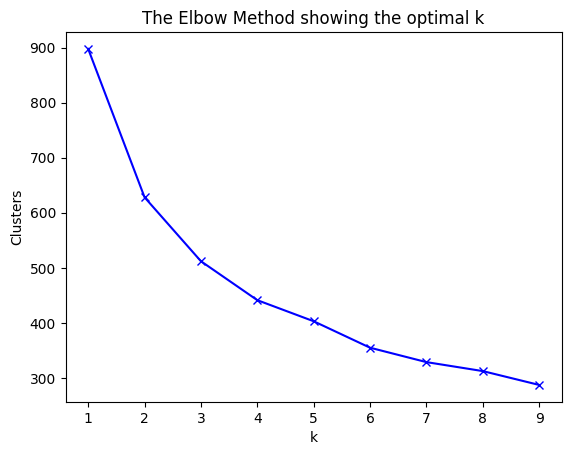

In [ ]:
#create an elbow plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Clusters')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#kmeans results after choosing number of clusters
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(sticks_forcluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
#assign cluster number
sticks_forcluster['k_means']=kmeanModel.predict(sticks_forcluster)

len(sticks_forcluster)#number of records
sticks_forcluster.info()#fields
sticks_forcluster.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   I tend to plan things very carefully.                                393 non-null    int64  
 1   I sometimes have trouble controlling my spending.                    393 non-null    int64  
 2   I think it is important to purchase products that are made locally.  393 non-null    float64
 3   I carefully consider the health benefits of what I eat.              393 non-null    int64  
 4   k_means                                                              393 non-null    int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 16.9 KB


,I tend to plan things very carefully.,I sometimes have trouble controlling my spending.,I think it is important to purchase products that are made locally.,I carefully consider the health benefits of what I eat.,k_means
0,1,2,3.0,2,0
1,1,3,3.0,2,1
2,2,4,3.0,2,4
3,2,4,1.0,2,4
4,2,4,2.0,3,3
5,2,4,2.0,1,4
6,2,2,3.0,3,3
7,1,2,1.0,1,0
8,3,3,2.0,3,3
9,1,4,3.0,2,1


In [ ]:
#merge back to other data
# Select the ones you want
sticks['km.out.cluster'] = sticks_forcluster['k_means']

In [ ]:
sticks.head()

In [ ]:
#how many ended up in each cluster
pd.Series(kmeanModel.labels_).value_counts()

4    122
2     85
1     83
0     56
3     47
dtype: int64

In [ ]:
#cluster centers
print(kmeanModel.cluster_centers_)

[[1.14285714 1.67857143 1.55357143 1.42857143]
 [1.         3.65060241 1.84337349 1.46987952]
 [2.24705882 1.89411765 1.90588235 1.96470588]
 [2.21276596 3.         2.4893617  3.06382979]
 [2.24590164 3.50819672 1.8442623  1.63934426]]


cluster_centers_: ndarray of shape (n_clusters, n_features)

So, each column is a feature (mean) and each row is the cluster


In [ ]:
Survey_Data_Cluster_Centers = pd.DataFrame(kmeanModel.cluster_centers_)
Survey_Data_Cluster_Centers.head()

,0,1,2,3
0,1.142857,1.678571,1.553571,1.428571
1,1.000000,3.650602,1.843373,1.469880
2,2.247059,1.894118,1.905882,1.964706
3,2.212766,3.000000,2.489362,3.063830
4,2.245902,3.508197,1.844262,1.639344


In [ ]:
#Sum of distances of observation to its closest cluster center
kmeanModel.inertia_

#well, that looks pretty close to R and SPSS

In [ ]:
#create a plot to make sense of this
plt.figure(figsize=(8, 6))
plt.scatter(sticks['I think it is important to purchase products that are made locally.'],
            sticks['I carefully consider the health benefits of what I eat.'],
            c=sticks['km.out.cluster'])
plt.title("Kmeans")
plt.xlabel("LOCAL IMPORTANT")
plt.ylabel("HEALTH BENEFITS IMPORTANT")

In [ ]:
#mosiac plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(sticks,['km.out.cluster','Customer'])
plt.show()

In [ ]:
#export means to csv
from google.colab import files
Survey_Data_Cluster_Centers.to_csv('Survey_Data_Cluster_Centers_Python.csv')
files.download('Survey_Data_Cluster_Centers_Python.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#export data to csv
from google.colab import files
sticks.to_csv('Survey_Data_Cluster_Python.csv')
files.download('Survey_Data_Cluster_Python.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>